# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | kuta
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | yuzhno-kurilsk
Processing Record 5 of Set 1 | bathurst city centre
City not found. Skipping...
Processing Record 6 of Set 1 | deqen
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | pahrump
Processing Record 9 of Set 1 | hun
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | pathein
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | sosnogorsk
Processing Record 14 of Set 1 | cueibet
City not found. Skipping...
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | vilyuchinsk
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | ush

Processing Record 35 of Set 4 | leninskoye
Processing Record 36 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 37 of Set 4 | betare oya
Processing Record 38 of Set 4 | kodiak
Processing Record 39 of Set 4 | les cayes
Processing Record 40 of Set 4 | zaozersk
Processing Record 41 of Set 4 | howrah
Processing Record 42 of Set 4 | ghat
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | tralee
Processing Record 45 of Set 4 | bubaque
Processing Record 46 of Set 4 | fuyuan
Processing Record 47 of Set 4 | tazovsky
Processing Record 48 of Set 4 | mareeba
Processing Record 49 of Set 4 | gizo
Processing Record 0 of Set 5 | tashla
Processing Record 1 of Set 5 | puerto armuelles
Processing Record 2 of Set 5 | sajir
Processing Record 3 of Set 5 | collipulli
Processing Record 4 of Set 5 | sodra sandby
Processing Record 5 of Set 5 | uray
Processing Record 6 of Set 5 | chul'man
Processing Record 7 of Set 5 | fort mcmurray
Processing Record 8 of Set 5 | s

Processing Record 26 of Set 8 | tomok bolon
City not found. Skipping...
Processing Record 27 of Set 8 | shannon
Processing Record 28 of Set 8 | dudinka
Processing Record 29 of Set 8 | sarangani
Processing Record 30 of Set 8 | utete
Processing Record 31 of Set 8 | hayma'
City not found. Skipping...
Processing Record 32 of Set 8 | colonel hill
Processing Record 33 of Set 8 | sodankyla
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | lethem
Processing Record 36 of Set 8 | blora
Processing Record 37 of Set 8 | noosa heads
Processing Record 38 of Set 8 | nema
Processing Record 39 of Set 8 | villa tupac amaru
Processing Record 40 of Set 8 | vorgashor
Processing Record 41 of Set 8 | boulsa
Processing Record 42 of Set 8 | soio
Processing Record 43 of Set 8 | northwest harborcreek
Processing Record 44 of Set 8 | mirny
Processing Record 45 of Set 8 | ba
City not found. Skipping...
Processing Record 46 of Set 8 | aripuana
Processing Record 47 of Set 8 | murzuq
Processing R

Processing Record 15 of Set 12 | posadas
Processing Record 16 of Set 12 | road town
Processing Record 17 of Set 12 | shakawe
Processing Record 18 of Set 12 | lander
Processing Record 19 of Set 12 | san luis de la loma
Processing Record 20 of Set 12 | port augusta
Processing Record 21 of Set 12 | newcastle west
Processing Record 22 of Set 12 | la ronge
Processing Record 23 of Set 12 | sambava
Processing Record 24 of Set 12 | upata
Processing Record 25 of Set 12 | laascaanood
Processing Record 26 of Set 12 | saldanha
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,297.69,52,97,1.40,ZA,1691159652
1,kuta,-8.7233,115.1723,299.12,88,20,3.13,ID,1691160158
2,margaret river,-33.9500,115.0667,283.35,79,100,3.19,AU,1691160159
3,yuzhno-kurilsk,44.0306,145.8556,288.71,99,100,3.73,RU,1691159671
4,deqen,29.9618,90.7188,284.51,88,100,1.79,CN,1691160161


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,297.69,52,97,1.40,ZA,1691159652
1,kuta,-8.7233,115.1723,299.12,88,20,3.13,ID,1691160158
2,margaret river,-33.9500,115.0667,283.35,79,100,3.19,AU,1691160159
3,yuzhno-kurilsk,44.0306,145.8556,288.71,99,100,3.73,RU,1691159671
4,deqen,29.9618,90.7188,284.51,88,100,1.79,CN,1691160161


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

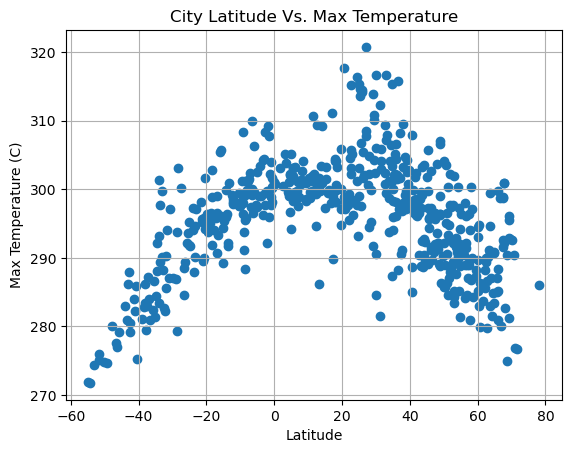

In [14]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

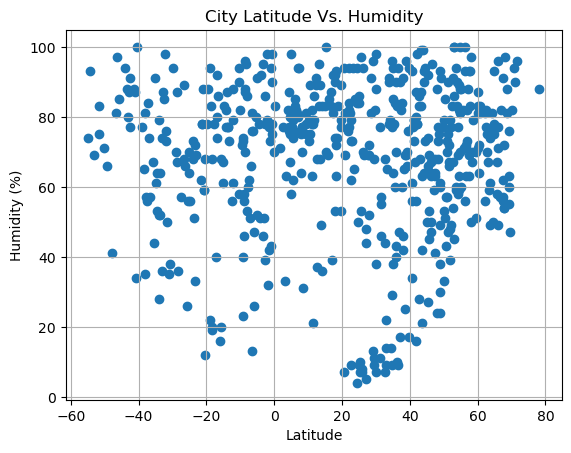

In [15]:
# Build scatter plot for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

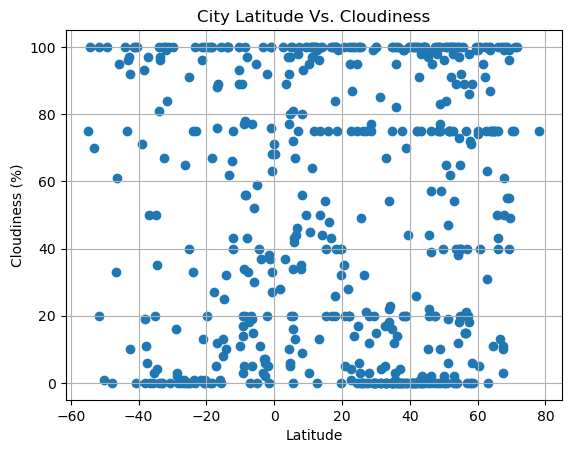

In [16]:
# Build scatter plot for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

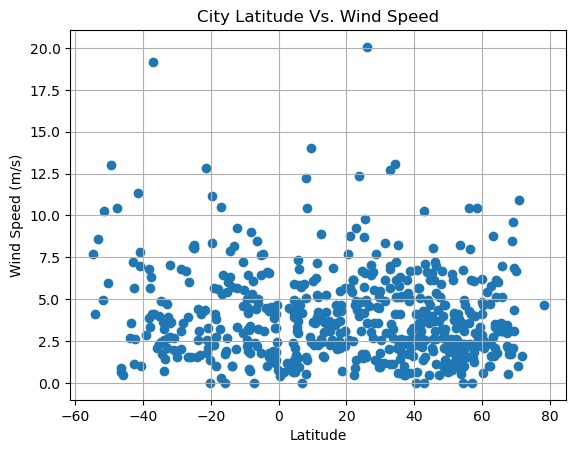

In [17]:
# Build scatter plot for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE